### Manifold Learning nedir: 
Manifold Learning, yüksek boyutlu verileri indirgemek ve yorumlamayı kolaylaştırmak için kullanılan yöntemlerden biridir. Bu teknik karmaşık veri setlerini daha basit, düşük boyutlu yapılar olarak görmemizi sağlar.

Genellikle kağıt örneği konuyu açıklamak için kullanılıyor:

Örnekte elimizde iki boyutlu (uzunluk ve genişlik) bir kağıt olduğunu düşünelim. Eğer bu kağıdı üç boyutlu bir uzayda rulo haline getirirsek, kağıt üç boyutlu bir şekil alır. Ancak, bu nesne bilgi açısından hala iki boyutlu bir kağıttır. Yani, manifold öğrenme açısından, bu rulo yapılmış kağıt, üç boyutlu bir uzayda yer almasına rağmen, temel yapısı aslında iki boyutlu bir manifolddur.

Yüksek boyutlu verileri analiz ederken, bu veriler karmaşık ve anlaşılması zor olabilir (tıpkı rulo yapılmış bir kağıt gibi). Manifold Learning, veriyi yüksek boyutlu bir uzayda incelemek yerine, bu verilerin aslında daha basit ve düşük boyutlu bir yapıya sahip olduğunu keşfetmek için kullanılır (örneğin, iki boyutlu bir kağıt gibi). Bu sayede, veriler arasındaki ilişkileri ve yapıları daha iyi anlayabiliyoruz.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns; sns.set()
import numpy as np
from matplotlib import colormaps

In [2]:
# manifoldu tanımlamak için bazı veriler oluşturacağız
# Oluşturacağımız veri 2 boyutlu olacak

In [3]:
def make_yunus(N = 1000 , rseed = 42):
    #kaydetme
    fig ,ax = plt.subplots(figsize =(4,1))
    fig.subplots_adjust(left = 0 ,right =1,bottom=0 ,top =1)
    ax.axis("off")
    ax.text(0.5,0.4,"YUNUS", va = "center",ha ="center",weight="bold",size =85)
    fig.savefig("yunus.png")
    plt.close(fig)
    
    #png yi aç ve rastkele noktalar çiz
    data = imread("yunus.png")[::-1,:,0].T
    rng = np.random.RandomState(rseed)
    X=rng.rand(4*N,2)
    i,j = (X* data.shape).astype(int).T
    mask = (data[i,j] <1)
    X = X[mask]
    X[:,0] *= (data.shape[0] / data.shape[1])
    X=X[:N]
    return X[np.argsort(X[:,0])]
   

In [4]:
#Grafikte gördüğümüz yazı farklı yönlere de çevirsek yine de yunus yazısını görebileceğiz.
#Bu bize verilerin sağa sola veya farklı bir yönde olsa bile
#verideki ilişkiler için yönün bir öneminin olmadığını gösterir.

# Yönün veri üzerinde bir etkisi olmadığı için;
#önemli olan her bir nokta ile veri kümesindeki diğer noktalar arasındaki uzaklık.

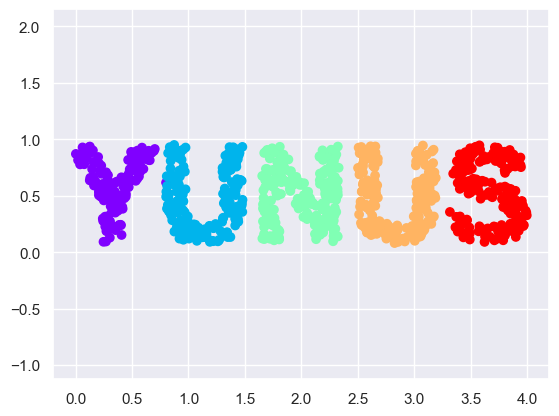

In [5]:
X= make_yunus(1000)
colorize = dict (c = X[:,0], cmap=colormaps["rainbow"].resampled(5))
plt.scatter(X[:, 0],  X[:, 1], **colorize)
plt.axis("equal");

In [6]:
#Dönüşüm matrisini kullanarak resmi döndürme.

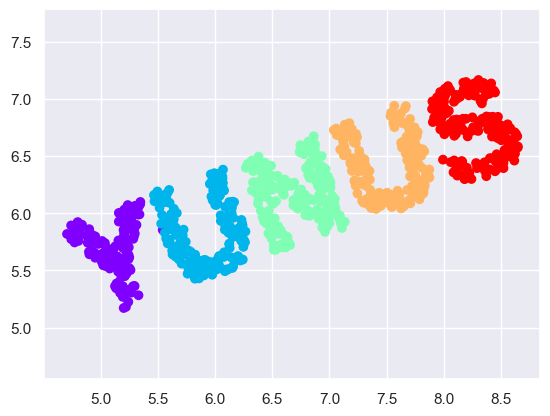

In [7]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis("equal");

In [8]:
#pairwise_distance 

In [9]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

In [10]:
#Döndürülmüş

In [11]:
D2 = pairwise_distances(X2)
D2.shape

(1000, 1000)

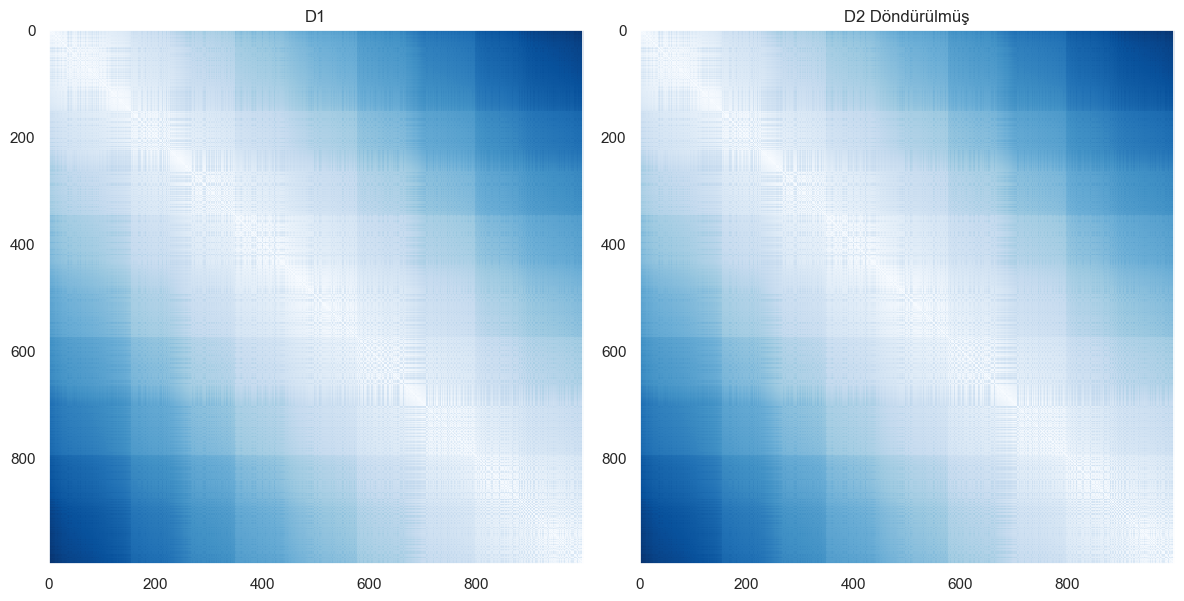

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
im1 = ax1.imshow(D, zorder = 2 , cmap="Blues" , interpolation="nearest")
ax1.set_title("D1")
im2 = ax2.imshow(D2, zorder = 2 , cmap="Blues" , interpolation="nearest")
ax2.set_title("D2 Döndürülmüş")
plt.tight_layout()
plt.show()

In [13]:
# Yukarıda görüldüğü üzere 2 grafik de aynı.
#Yani rotasyona uğramış veya bükülmüş kağıttaki veri ile
#normal rotasyona uğramamış bükülmemiş kağıttaki veri aynı.

# Şimdi bu uzaklık matrisini kullanarak daha öncesinde oluşturduğumuz veri noktalarınıa (YUNUS)
# yazısını geri getireceğiz

In [14]:
from sklearn.manifold import MDS

In [21]:
model = MDS(n_components=2,dissimilarity="precomputed",normalized_stress='auto',random_state=1)

In [23]:
out = model.fit_transform(D)

In [36]:
out_r=rotate(out,288)

(-2.3044186264979034,
 2.083316629655587,
 -0.4805024294861379,
 0.4894260925814916)

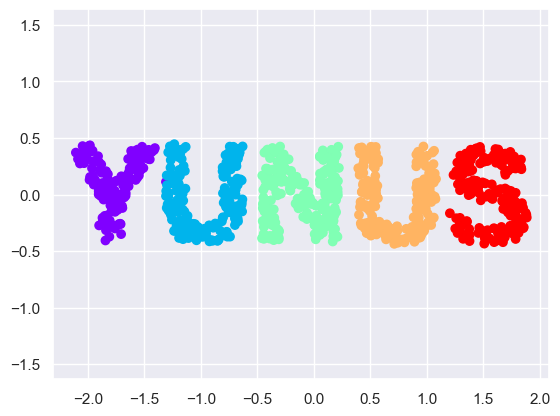

In [37]:
plt.scatter(out_r[:,0],out_r[:,1],**colorize)
plt.axis("equal")